In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Loading Bangalore-home-prices data into a dataframe

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### The next few steps is to understand the data

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
#Finding the type of areas available in Bangalore

df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
#Understanding the various types of bedrooms available

df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### Dropping the features that are not required to build the regression model

In [8]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df1.shape

(13320, 5)

# Data Cleaning

In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
#Dropping the null values from the dataframe

df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
#Understanding the various types of bedrooms available

df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
#It can be observed that the sizes of the bedrooms in the 'size' columns are not uniform, so that has to be in proper format
#For that, a new column called 'bhk' could be created which has only numeric data

df2['bhk'] = df2['size'].apply(lambda x: x.split(" ")[0])
df2.head()

C:\Users\harsh\AppData\Local\Temp/ipykernel_6560/3509277826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: x.split(" ")[0])


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df2.drop('size', axis = 1, inplace = True)
df2.head()

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


### Data Cleaning: Feature Engineering

In [15]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#It is observed that the data type in 'total_sqft' is not uniform which needs to be transformed
#Some data is in ranges and some other is a string like "x sq ft" and "x square feet"

In [17]:
#Finding the data that is non-numeric

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[df2['total_sqft'].apply(is_float)==False]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. Dropping such cases to keep things simple!

In [19]:
def avg_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [20]:
avg_sqft('620 - 934')

777.0

In [21]:
avg_sqft('38Guntha')

#### The function is verified and can be used on the dataframe.

In [22]:
# Applying the created function to the tota_sqft column for data cleaning

df3 = df2.copy()
df3['total_sqft'] = df2['total_sqft'].apply(avg_sqft)
df3 = df3[df3.total_sqft.notnull()]
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [23]:
#Creating a new feature price_per_sqft in the dataframe

df4 = df3.copy()
df4['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [24]:
df4['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

#### Cleaning the location data; Elimination the locations that has very less frequency and classifying them as 'other'. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [25]:
len(df4.location.unique())

1298

In [26]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [27]:
len(location_stats)

1287

In [28]:
#Finding the number of locations that have locations<=10

len(location_stats[location_stats <=10])

1047

In [29]:
location_stats[location_stats > 10]

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
HAL 2nd Stage                 11
Banjara Layout                11
LB Shastri Nagar              11
Kodigehalli                   11
2nd Phase Judicial Layout     11
Name: location, Length: 240, dtype: int64

In [30]:
less_than_10 = location_stats[location_stats <=10]
less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

#### Applying lambda function such that less frequent elements in 'location' column are classified into 'other' category

In [31]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in less_than_10 else x)

df4.location.value_counts()

other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: location, Length: 241, dtype: int64

### Data Cleaning: Outlier detection and removal

In real estate sector, normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. Outliers shall be removed such that minimum thresold per bhk to be 300 sqft

In [32]:
df4.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [33]:
#Coverting 'bhk' column into float for deriving the feature total-sq-ft per bedroom

df4.bhk = df4.bhk.apply(lambda x: float(x))

In [34]:
df4[(df4.total_sqft)/(df4.bhk)<300].head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8.0,6296.296296
70,other,500.0,3.0,100.0,3.0,20000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2.0,4782.608696
89,Rajaji Nagar,710.0,6.0,160.0,6.0,22535.211268
119,Hennur Road,276.0,3.0,23.0,2.0,8333.333333
129,Vishwapriya Layout,950.0,7.0,115.0,7.0,12105.263158
149,other,1034.0,5.0,185.0,6.0,17891.682785


In [35]:
df4.shape

(13200, 6)

#### By observing the above points, it is clear that these are data errors that has to be removed. Ex: We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600

In [36]:
df5 = df4[(df4.total_sqft)/(df4.bhk) >= 300]
df5.shape

(12456, 6)

#### Data Cleaning: Outlier Removal Using Standard Deviation and Mean

In [37]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 rs/sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.

In [38]:
df5.groupby('location').mean().head()

,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,
1st Block Jayanagar,1915.000000,3.100000,254.100000,3.200000,12359.253758
1st Phase JP Nagar,1800.695652,3.043478,172.369565,2.956522,9726.405918
2nd Phase Judicial Layout,1173.272727,2.090909,46.181818,2.454545,4048.701183
2nd Stage Nagarbhavi,2127.777778,4.666667,270.111111,4.555556,14381.275720
5th Block Hbr Layout,2112.571429,3.142857,125.428571,3.428571,6622.120076


#### The function 'remove_pps_outliers' shall return a dataframe which has the outliers removed from the original dataframe. The only data that remains is (mean-std) and (mean+std)

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >= (m-s)) & (subdf.price_per_sqft <= (m+s))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(10242, 6)

In [40]:
df6.location.value_counts()

other                   2306
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Vishveshwarya Layout       4
Vishwapriya Layout         4
Banjara Layout             4
HAL 2nd Stage              4
Marsur                     3
Name: location, Length: 241, dtype: int64

#### Checking for a given location if the price of a house with more bedrooms is greater than the house with less bedrooms.
#### ex: price_per_sqft(3BHK > price_per_sqft(2BHK)
#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

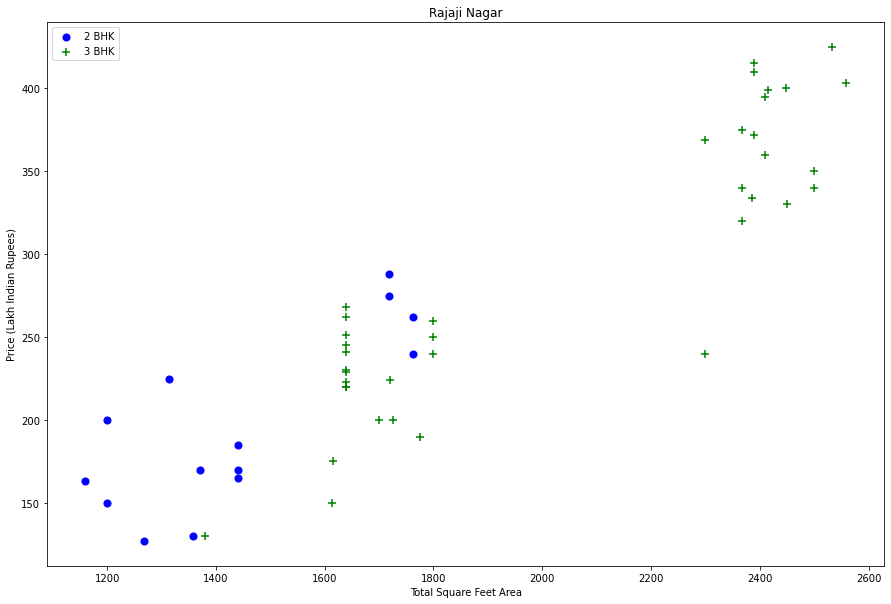

In [41]:
def plot_scatter_chart(df,LOC):
    #bhk_n contains all the houses in a given location with bhk = n
    bhk2 = df[(df.location==LOC) & (df.bhk==2)]
    bhk3 = df[(df.location==LOC) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(LOC)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

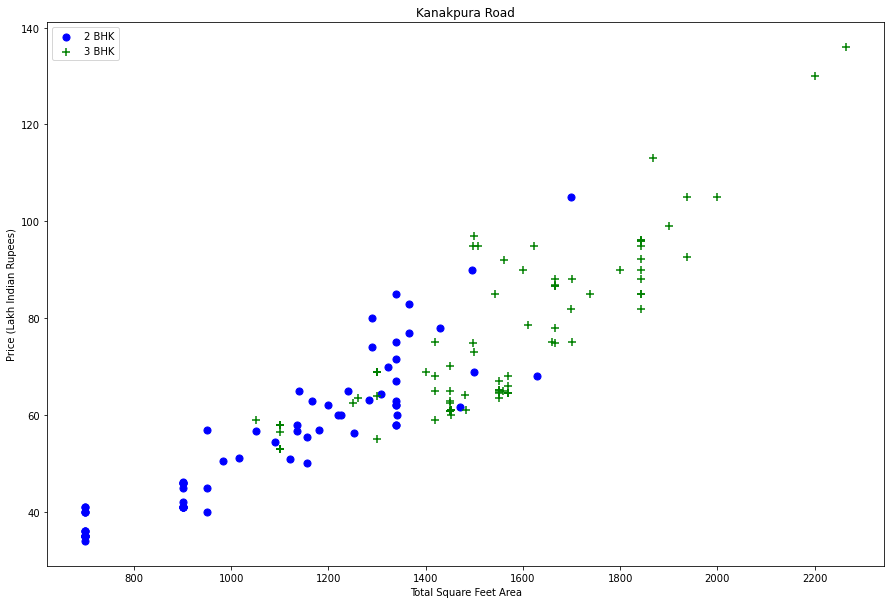

In [42]:
plot_scatter_chart(df6,"Kanakpura Road")

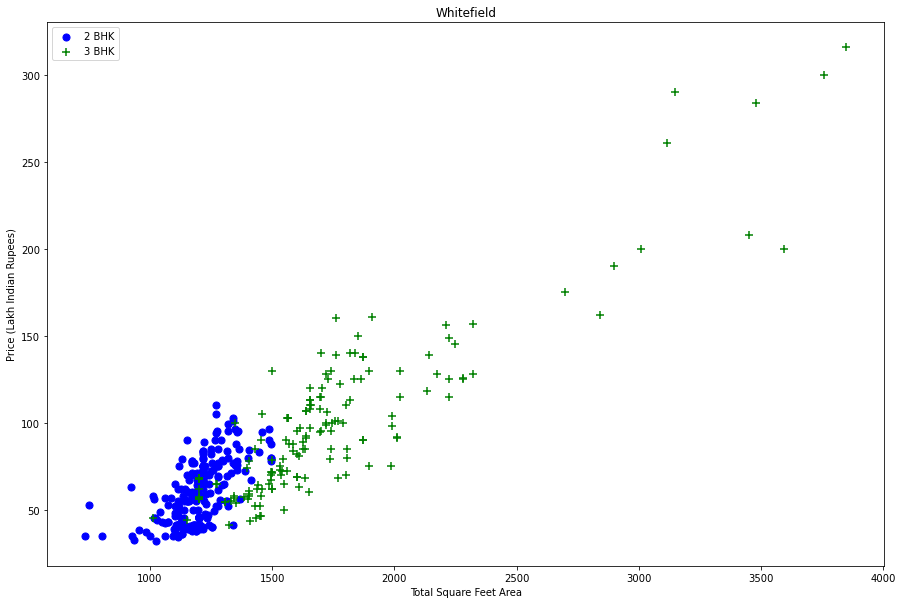

In [43]:
plot_scatter_chart(df6,"Whitefield")

In [44]:
df6[df6.bhk==3].price.describe()

count    4002.000000
mean      102.957790
std        66.136277
min        25.530000
25%        65.000000
50%        85.150000
75%       120.000000
max       900.000000
Name: price, dtype: float64

In [45]:
df6[df6.bhk==2].price.describe()

count    4756.000000
mean       58.666918
std        24.662862
min        13.500000
25%        44.000000
50%        54.000000
75%        68.000000
max       288.000000
Name: price, dtype: float64

#### Now, we can remove the data points of 'n' BHK in the same location that have lesser price_per_sqft than (n-1) BHK in the same location
#### EX: We can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [46]:
def remove_bhk_outliers(df):
    
    drop_indices = np.array([])
    #creating a blank array, that can later be appended with the indices that can be removed!
    
    for key, location_df in df.groupby('location'):
        #we group the data by location, such that indidual sub-dataframes can be iterated grouping on 'bhk'
        
        bhk_stats = {}
        #dictionary can be created for comparing the mean, std, count of the price_per_sqft of 'n' BHK and (n-1) in the same location
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            # 'stats' represent the mean, std, count of the (n-1)BHK
            
            if stats and stats['count']>5:
                drop_indices = np.append(drop_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(drop_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7317, 6)

#### Rechecking the above plots whether there's change after removing the outliers

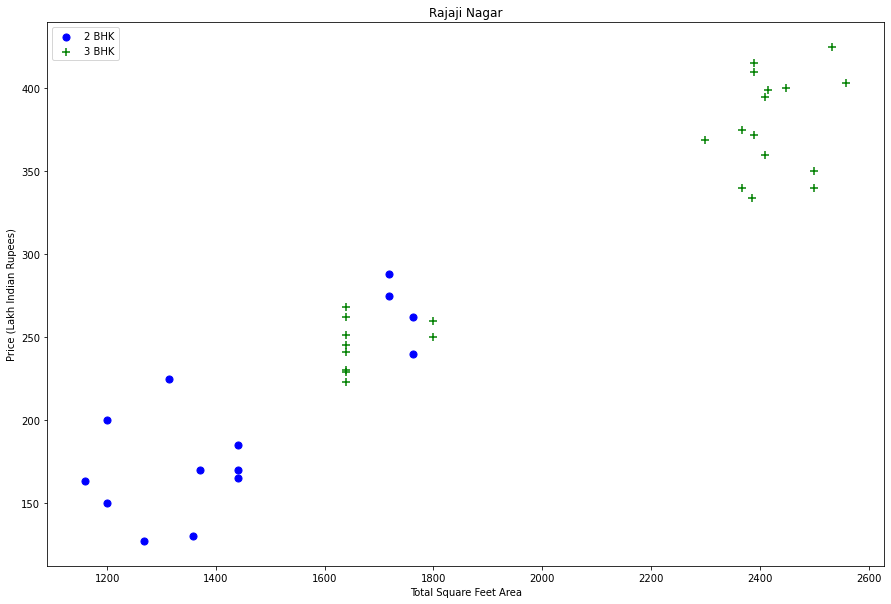

In [47]:
plot_scatter_chart(df7,"Rajaji Nagar")

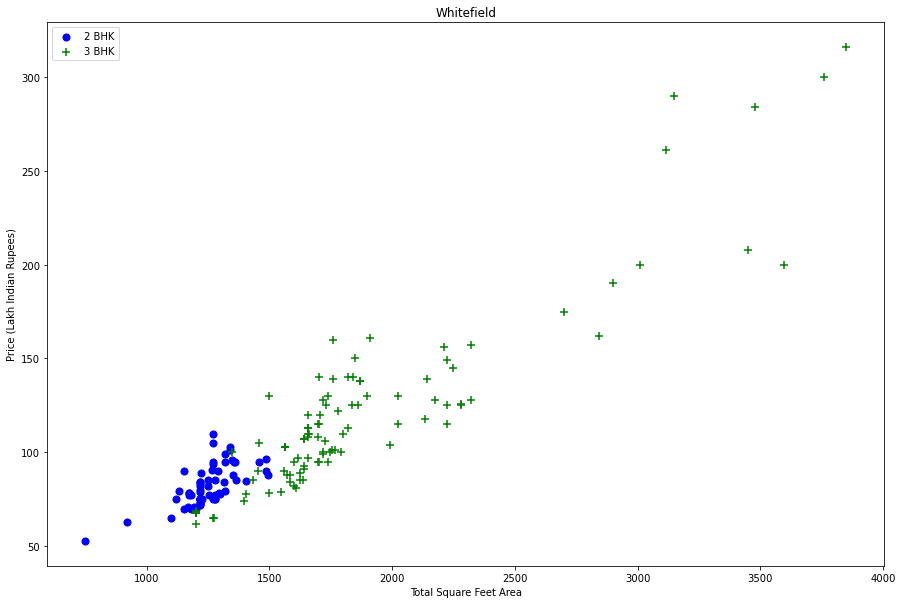

In [48]:
plot_scatter_chart(df7,"Whitefield")

Text(0, 0.5, 'Count')

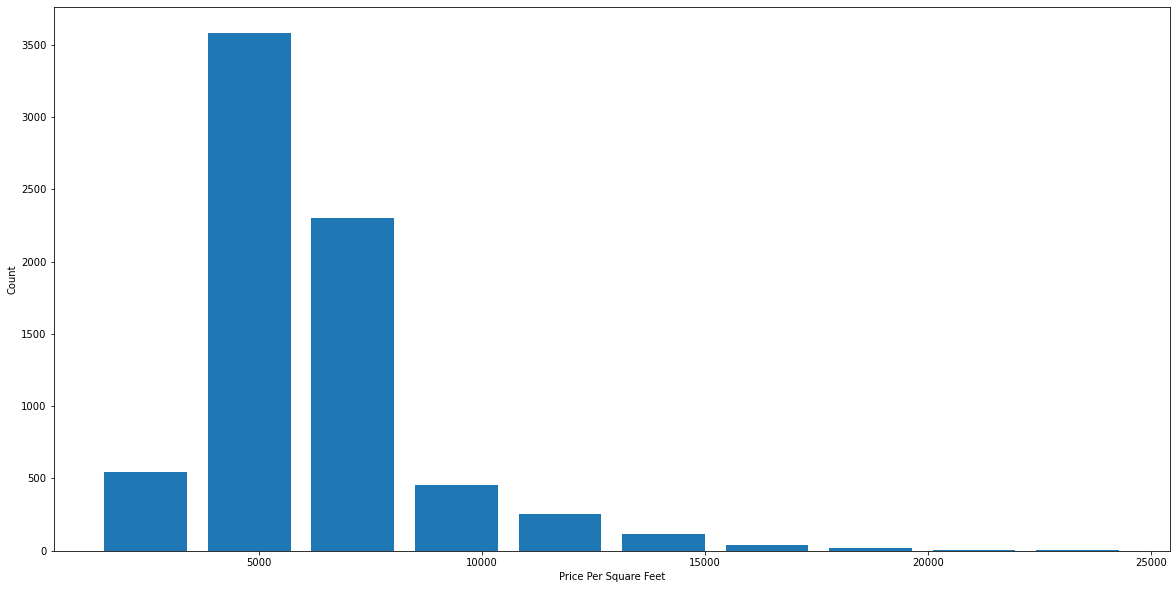

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Data Cleaning: Outlier Removal Using Bathrooms Feature

In [50]:
#Finding the different number of bathrooms

df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

#### Generally, it is unusual to have 2 more bathrooms than number of bedrooms in a home. In real estate, total bathrooms = total bedrooms + 1 max. Anything above that is an outlier or a data error and can be removed.

In [51]:
df8 = df7[df7.bath <= (df7.bhk + 1)]
df8.shape

(7239, 6)

In [52]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [53]:
df8.drop('price_per_sqft', axis = 1, inplace = True)
df8.head(2)

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0


In [54]:
dummies = pd.get_dummies(df8.location)

df9 = pd.concat([df8, dummies.drop('other',axis='columns')], axis='columns')
df9.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df10 = df9.drop('location', axis = 1)
df10.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df10.shape

(7239, 244)

# Building a Machine Learning model

In [57]:
X = df10.drop(['price'],axis=1)
y = df10.price

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.025, random_state = 10)

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_predicted = model.predict(X_test)

In [61]:
model.score(X_test, y_test)

0.8144351744537413

### Using K Fold cross validation to measure accuracy of the LinearRegression model

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

np.mean(cross_val_score(LinearRegression(), X, y, cv=cv))

0.8477957812447835

##### Therefore, the model built has an accuracy of 85%

### Finding the best model using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726738,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.719241,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# Testing the model for few properties

In [64]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [65]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

85.9062743715579

In [66]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

88.03665938988497

In [67]:
predict_price('Indira Nagar',1000, 2, 2)

179.68406762335235

In [68]:
predict_price('Whitefield', 1200, 2, 4)

68.1209851997875

### Exporting the Model

In [69]:
import pickle
with open('banglore_HPP_model.pickle','wb') as f:
    pickle.dump(model,f)

In [70]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))